In [16]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pprint import pprint

%matplotlib inline

In [17]:
pumpkins = pd.read_csv('../../data/US-pumpkins.csv')

pumpkins = pumpkins[pumpkins['Package'].str.contains('bushel', case=True, regex=True)]

In [18]:
display(pumpkins)
pprint(pumpkins.columns)

City Name Type               Package    Variety Sub Variety  Grade  \
70    BALTIMORE  NaN  1 1/9 bushel cartons   PIE TYPE         NaN    NaN   
71    BALTIMORE  NaN  1 1/9 bushel cartons   PIE TYPE         NaN    NaN   
72    BALTIMORE  NaN  1 1/9 bushel cartons   PIE TYPE         NaN    NaN   
73    BALTIMORE  NaN  1 1/9 bushel cartons   PIE TYPE         NaN    NaN   
74    BALTIMORE  NaN  1 1/9 bushel cartons   PIE TYPE         NaN    NaN   
...         ...  ...                   ...        ...         ...    ...   
1738  ST. LOUIS  NaN    1/2 bushel cartons  MINIATURE   FLAT TYPE    NaN   
1739  ST. LOUIS  NaN    1/2 bushel cartons  MINIATURE   FLAT TYPE    NaN   
1740  ST. LOUIS  NaN    1/2 bushel cartons  MINIATURE   FLAT TYPE    NaN   
1741  ST. LOUIS  NaN    1/2 bushel cartons  MINIATURE   FLAT TYPE    NaN   
1742  ST. LOUIS  NaN    1/2 bushel cartons  MINIATURE   FLAT TYPE    NaN   

         Date  Low Price  High Price  Mostly Low  ...  Unit of Sale Quality  \
70    9/24/16      15.00        15.0        15.0  ...           NaN     NaN   
71    9/24/16      18.00        18.0        18.0  ...           NaN     NaN   
72    10/1/16      18.00        18.0        18.0  ...           NaN     NaN   
73    10/1/16      17.00        17.0        17.0  ...           NaN     NaN   
74    10/8/16      15.00        15.0        15.0  ...           NaN     NaN   
...       ...        ...         ...         ...  ...           ...     ...   
1738  9/30/16      15.00        15.0         NaN  ...           NaN     NaN   
1739  9/30/16      13.75        15.0         NaN  ...           NaN     NaN   
1740  9/30/16      10.75        15.0         NaN  ...           NaN     NaN   
1741  9/30/16      12.00        12.0         NaN  ...           NaN     NaN   
1742  9/30/16      12.00        12.0         NaN  ...           NaN     NaN   

     Condition Appearance Storage  Crop Repack  Trans Mode  Unnamed: 24  \
70         NaN        NaN     NaN   NaN      N         NaN          NaN   
71         NaN        NaN     NaN   NaN      N         NaN          NaN   
72         NaN        NaN     NaN   NaN      N         NaN          NaN   
73         NaN        NaN     NaN   NaN      N         NaN          NaN   
74         NaN        NaN     NaN   NaN      N         NaN          NaN   
...        ...        ...     ...   ...    ...         ...          ...   
1738       NaN        NaN     NaN   NaN      N         NaN          NaN   
1739       NaN        NaN     NaN   NaN      N         NaN          NaN   
1740       NaN        NaN     NaN   NaN      N         NaN          NaN   
1741       NaN        NaN     NaN   NaN      N         NaN          NaN   
1742       NaN        NaN     NaN   NaN      N         NaN          NaN   

      Unnamed: 25  
70            NaN  
71            NaN  
72            NaN  
73            NaN  
74            NaN  
...           ...  
1738       LOWER.  
1739       LOWER.  
1740       LOWER.  
1741       LOWER.  
1742       LOWER.  

[415 rows x 26 columns]

Index(['City Name', 'Type', 'Package', 'Variety', 'Sub Variety', 'Grade',
       'Date', 'Low Price', 'High Price', 'Mostly Low', 'Mostly High',
       'Origin', 'Origin District', 'Item Size', 'Color', 'Environment',
       'Unit of Sale', 'Quality', 'Condition', 'Appearance', 'Storage', 'Crop',
       'Repack', 'Trans Mode', 'Unnamed: 24', 'Unnamed: 25'],
      dtype='object')


In [21]:
# A set of new columns for a new dataframe. Filter out nonmatching columns
# new_columns = ['Package', 'Month', 'Low Price', 'High Price', 'Date']
# pumpkins = pumpkins.drop(
    # [c for c in pumpkins.columns if c not in new_columns], axis=1)

# Get an average between low and high price for the base pumpkin price
pumpkins["price"] = (pumpkins['Low Price'] + pumpkins['High Price']) / 2

# Convert the date to its month only
pumpkins["month"] = pd.DatetimeIndex(pumpkins['Date']).month

# Create a new dataframe with this basic data
# new_pumpkins = pd.DataFrame(
#     {'Month': month, 'Package': pumpkins['Package'], 'Low Price': pumpkins['Low Price'], 'High Price': pumpkins['High Price'], 'Price': price})

# Convert the price if the Package contains fractional bushel values
# new_pumpkins.loc[new_pumpkins['Package'].str.contains(
#     '1 1/9'), 'Price'] = price/(1 + 1/9)

# new_pumpkins.loc[new_pumpkins['Package'].str.contains(
#     '1/2'), 'Price'] = price/(1/2)

In [22]:
display(pumpkins)

City Name Type               Package    Variety Sub Variety  Grade  \
70    BALTIMORE  NaN  1 1/9 bushel cartons   PIE TYPE         NaN    NaN   
71    BALTIMORE  NaN  1 1/9 bushel cartons   PIE TYPE         NaN    NaN   
72    BALTIMORE  NaN  1 1/9 bushel cartons   PIE TYPE         NaN    NaN   
73    BALTIMORE  NaN  1 1/9 bushel cartons   PIE TYPE         NaN    NaN   
74    BALTIMORE  NaN  1 1/9 bushel cartons   PIE TYPE         NaN    NaN   
...         ...  ...                   ...        ...         ...    ...   
1738  ST. LOUIS  NaN    1/2 bushel cartons  MINIATURE   FLAT TYPE    NaN   
1739  ST. LOUIS  NaN    1/2 bushel cartons  MINIATURE   FLAT TYPE    NaN   
1740  ST. LOUIS  NaN    1/2 bushel cartons  MINIATURE   FLAT TYPE    NaN   
1741  ST. LOUIS  NaN    1/2 bushel cartons  MINIATURE   FLAT TYPE    NaN   
1742  ST. LOUIS  NaN    1/2 bushel cartons  MINIATURE   FLAT TYPE    NaN   

         Date  Low Price  High Price  Mostly Low  ...  Condition Appearance  \
70    9/24/16      15.00        15.0        15.0  ...        NaN        NaN   
71    9/24/16      18.00        18.0        18.0  ...        NaN        NaN   
72    10/1/16      18.00        18.0        18.0  ...        NaN        NaN   
73    10/1/16      17.00        17.0        17.0  ...        NaN        NaN   
74    10/8/16      15.00        15.0        15.0  ...        NaN        NaN   
...       ...        ...         ...         ...  ...        ...        ...   
1738  9/30/16      15.00        15.0         NaN  ...        NaN        NaN   
1739  9/30/16      13.75        15.0         NaN  ...        NaN        NaN   
1740  9/30/16      10.75        15.0         NaN  ...        NaN        NaN   
1741  9/30/16      12.00        12.0         NaN  ...        NaN        NaN   
1742  9/30/16      12.00        12.0         NaN  ...        NaN        NaN   

     Storage Crop Repack  Trans Mode Unnamed: 24  Unnamed: 25   price  month  
70       NaN  NaN      N         NaN         NaN          NaN  15.000      9  
71       NaN  NaN      N         NaN         NaN          NaN  18.000      9  
72       NaN  NaN      N         NaN         NaN          NaN  18.000     10  
73       NaN  NaN      N         NaN         NaN          NaN  17.000     10  
74       NaN  NaN      N         NaN         NaN          NaN  15.000     10  
...      ...  ...    ...         ...         ...          ...     ...    ...  
1738     NaN  NaN      N         NaN         NaN       LOWER.  15.000      9  
1739     NaN  NaN      N         NaN         NaN       LOWER.  14.375      9  
1740     NaN  NaN      N         NaN         NaN       LOWER.  12.875      9  
1741     NaN  NaN      N         NaN         NaN       LOWER.  12.000      9  
1742     NaN  NaN      N         NaN         NaN       LOWER.  12.000      9  

[415 rows x 28 columns]

In [23]:
pumpkins.isnull().sum()

City Name            0
Type               406
Package              0
Variety              0
Sub Variety        167
Grade              415
Date                 0
Low Price            0
High Price           0
Mostly Low          24
Mostly High         24
Origin               0
Origin District    396
Item Size          114
Color              145
Environment        415
Unit of Sale       404
Quality            415
Condition          415
Appearance         415
Storage            415
Crop               415
Repack               0
Trans Mode         415
Unnamed: 24        415
Unnamed: 25        391
price                0
month                0
dtype: int64

In [31]:
pumpkins["City Name"]

70      BALTIMORE
71      BALTIMORE
72      BALTIMORE
73      BALTIMORE
74      BALTIMORE
          ...    
1738    ST. LOUIS
1739    ST. LOUIS
1740    ST. LOUIS
1741    ST. LOUIS
1742    ST. LOUIS
Name: City Name, Length: 415, dtype: object

/opt/conda/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 40.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 56.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 36.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='month', ylabel='price'>

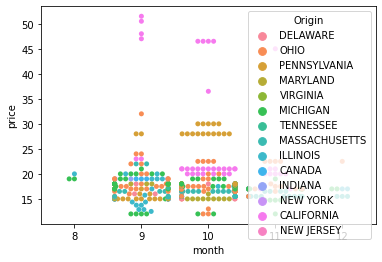

In [34]:
display(sns.swarmplot(x="month", y="price", hue="Origin", data=pumpkins))

/opt/conda/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 40.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 56.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 36.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='month', ylabel='price'>

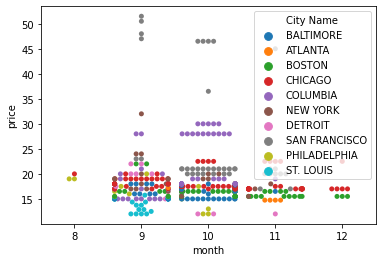

In [35]:
display(sns.swarmplot(x="month", y="price", hue="City Name", data=pumpkins))

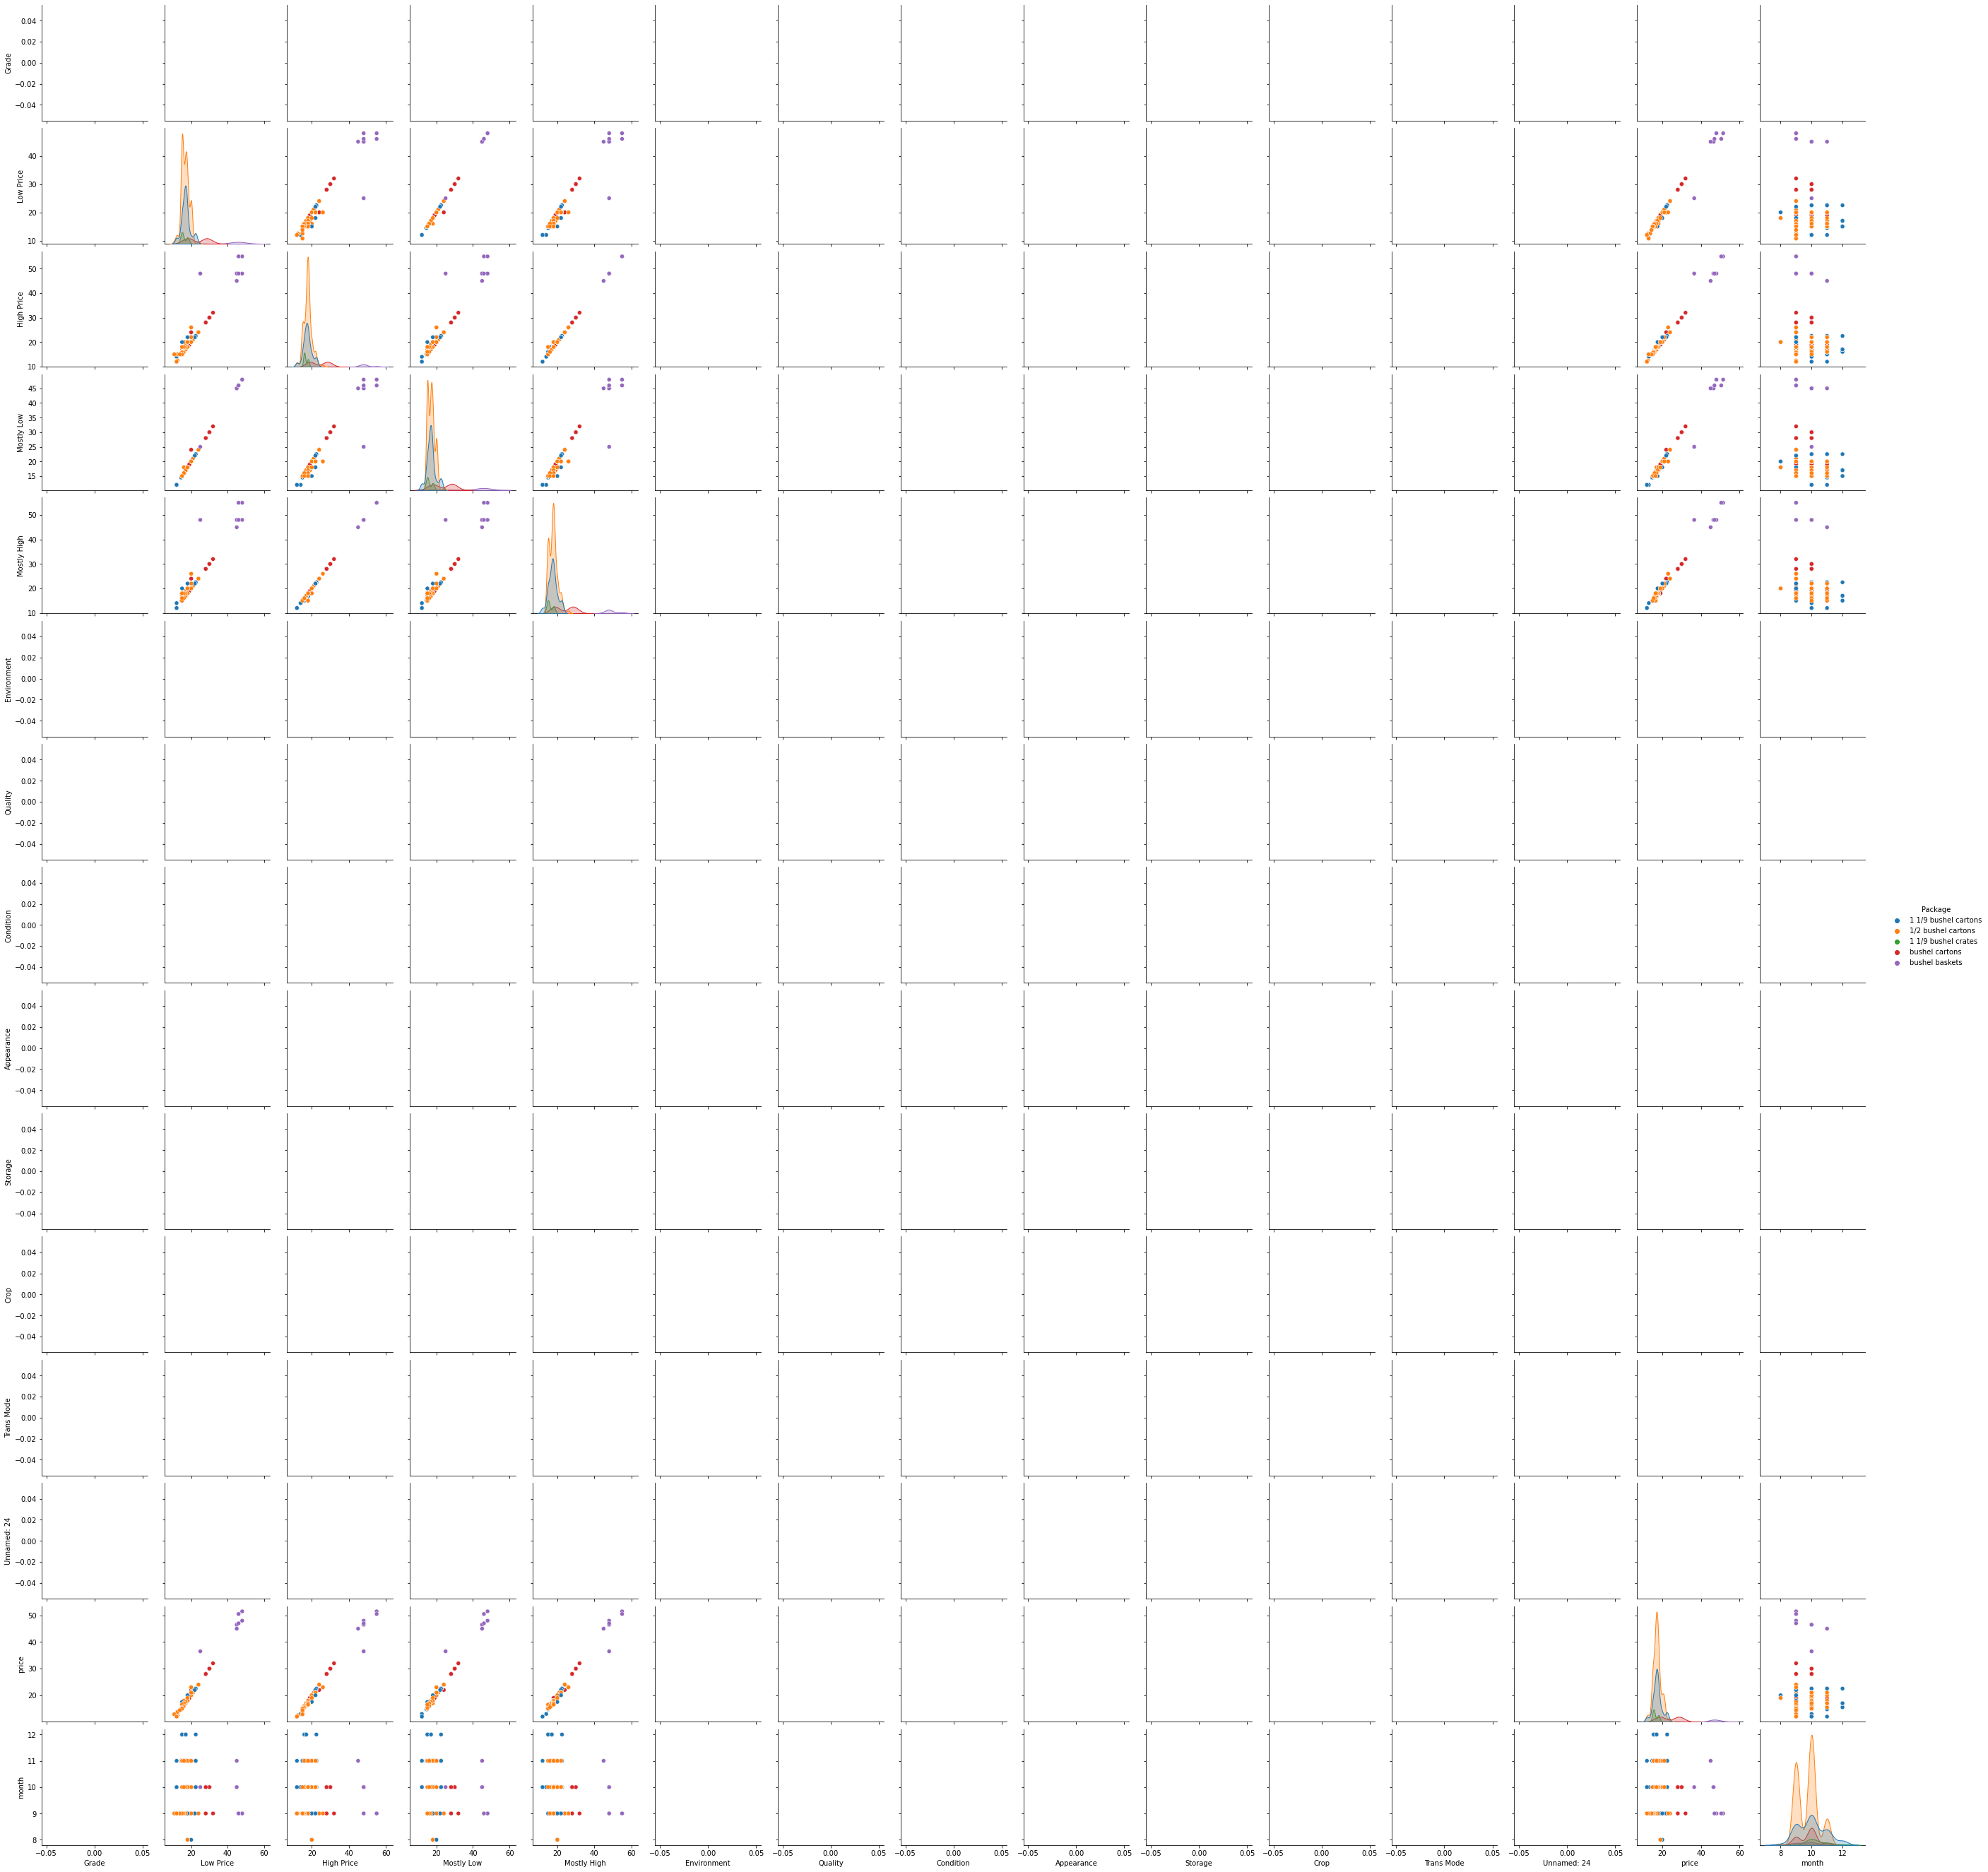

In [36]:
sns.pairplot(pumpkins, hue="Package")

<AxesSubplot:xlabel='month', ylabel='price'>

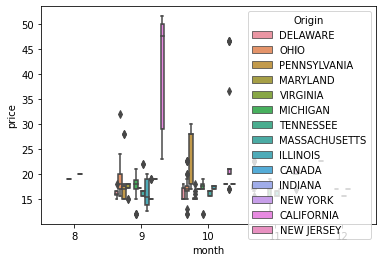

In [39]:
sns.boxplot(data=pumpkins, x="month", y="price", hue="Origin")

<AxesSubplot:xlabel='month', ylabel='price'>

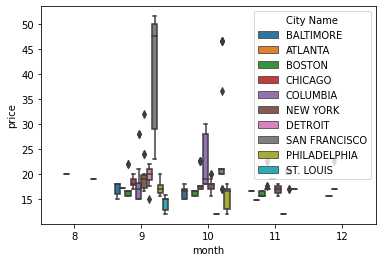

In [40]:
sns.boxplot(data=pumpkins, x="month", y="price", hue="City Name")